# QDAC-II constant voltage


In [1]:
from time import sleep
from IPython.display import Image, display
from qcodes_contrib_drivers.drivers.QDevil import QDAC2
qdac_addr = '192.168.8.153'
qdac = QDAC2.QDac2('QDAC-II', visalib='@py', address=f'TCPIP::{qdac_addr}::5025::SOCKET')
import qcodes.instrument_drivers.rigol.DS1074Z as DS1000Z
rigol_addr = '192.168.8.199'
scope = DS1000Z.DS1074Z('rigol', visalib='@py', address=f'TCPIP::{rigol_addr}::INSTR')

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jps/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jps/.qcodes/logs/211109-10602-qcodes.log
Connected to: QDevil QDAC-II (serial:48762, firmware:5-0.9.26) in 0.33s
Connected to: RIGOL TECHNOLOGIES DS1104Z (serial:DS1ZA171812151, firmware:00.04.03) in 0.04s


In [2]:
qdac.reset()
scope.write('*rst')
sleep(2)

In [3]:
def capture():
    scope.write('stop')
    scope.write(":disp:data?")
    bmpdata = scope.visa_handle.read_raw()[2+9:]
    image = Image(data=bmpdata)
    display(image)

In [4]:
scope.write('chan1:disp off')
scope.write('chan3:disp on')
scope.write('chan3:bwl on')
scope.write('chan3:prob 1')
scope.write('chan3:scal 2.0')
scope.write('chan3:offs -4.0')
scope.write('trig:edge:sour chan3')
scope.write('trig:edge:level 0.25')

In [5]:
qdac.ch03.output_mode(range='low', low_current_limit_A=1e-7)
scope.write('run')
qdac.ch03.dc_constant_V(2)
qdac.errors()

'0, "No error"'

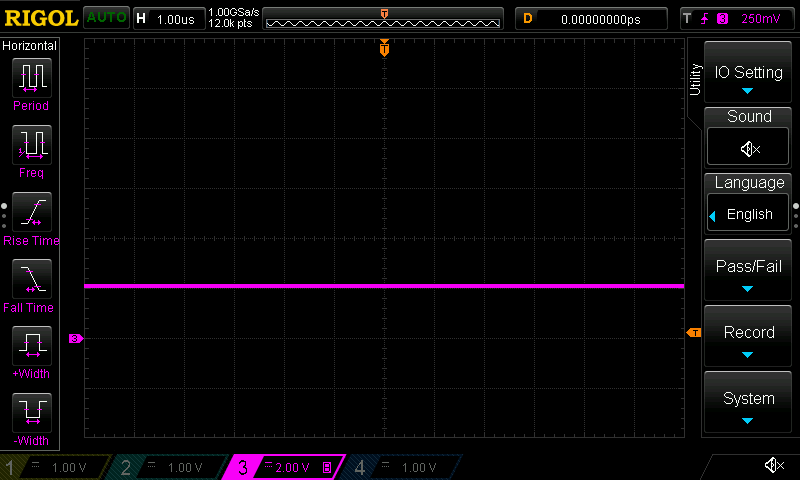

In [6]:
capture()

In [7]:
gate = qdac.channel(3)
gate.output_mode(range='high', high_current_limit_A=0.001)
scope.write('run')
gate.dc_constant_V(10.0)
qdac.errors()

'0, "No error"'

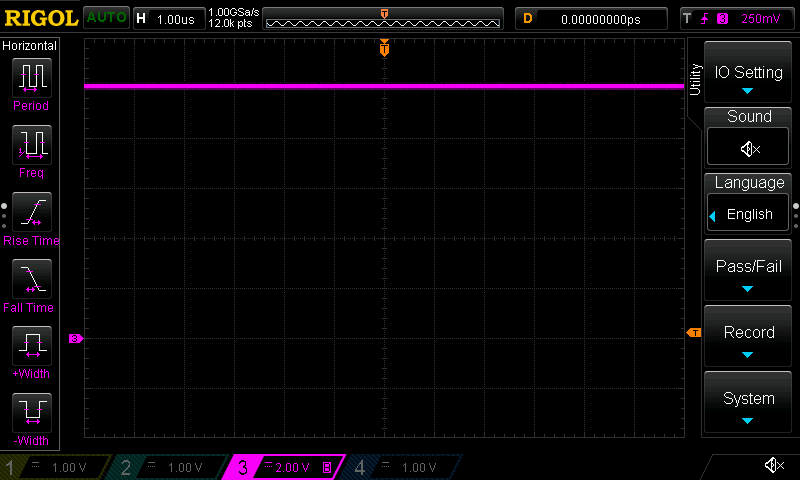

In [8]:
capture()

In [9]:
scope.write('chan3:scal 2.0')
scope.write('chan3:offs -4.0')
scope.write('trig:edge:sour chan3')
scope.write('trig:edge:level 5')
scope.write('trig:edge:slope neg')
scope.write('tim:scal 5e-2')

In [10]:
qdac.ch03.output_mode(range='high', filter='dc')
qdac.ch03.dc_constant_V(10.0)
scope.write('sing')
sleep(3)
qdac.ch03.dc_constant_V(0.0)
qdac.errors()

'0, "No error"'

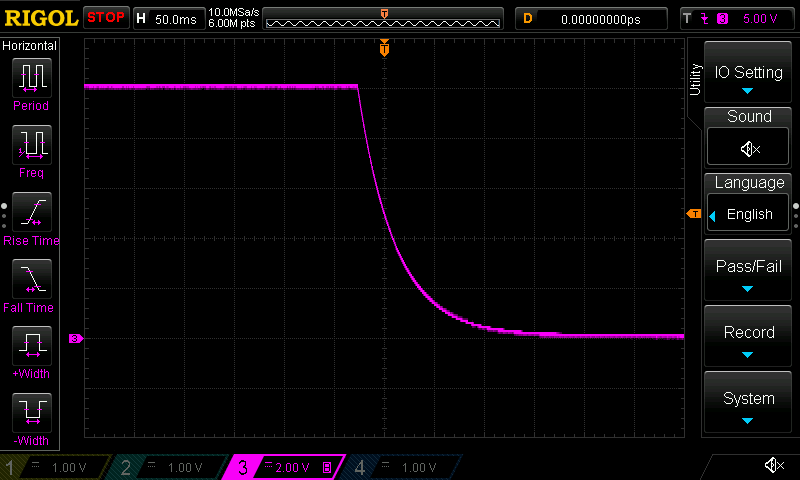

In [11]:
capture()